<a href="https://colab.research.google.com/github/SukanyaPathak2904/DemandForecasting/blob/main/demandforecastingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'''Considered this as a regression problem with 'units_sold' as a target
Generated following new features:
(a) Count of records per 'sku-id','store-id' and combination of both
(b) Average units sold per 'sku-id','store-id' and combination of both
(c) Average base-price & total-price per 'sku-id','store-id' and combination of both
(d) Week of the year
(e) Week number from start of data
(f) Week of the month
(g) Sine & Cosine transform of week number to capture cyclic nature
(e) Price difference percent between base price & total-price
Categorical Encoded 'sku-id' & 'store-id' with MEstimateEncoder()
Trained the data on RandomForest & LGBM Regressor
Tuned the above models'''

In [ ]:
dftrain = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Demand Forecasting/train_0irEZ2H.csv')
dftest = pd.read_csv ('/content/drive/MyDrive/Colab_Notebooks/Demand Forecasting/test_nfaJ3J5.csv')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
dftrain.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [ ]:
dftrain.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [ ]:
dftest.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
count,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000
mean,222460.146392,9199.422511,254761.132468,212.188874,223.922660,0.086580,0.133333
std,5668.258490,615.611603,85550.107852,93.138162,103.429522,0.281229,0.339947
min,212645.000000,8023.000000,216233.000000,65.550000,70.537500,0.000000,0.000000
25%,217557.750000,8562.000000,217217.000000,132.525000,137.512500,0.000000,0.000000
50%,222466.500000,9371.000000,222087.000000,213.037500,218.737500,0.000000,0.000000
75%,227367.250000,9731.000000,245338.000000,241.537500,261.487500,0.000000,0.000000
max,232287.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000


In [ ]:
dftrain.head(2)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


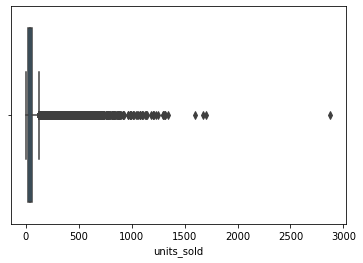

In [ ]:
sns.boxplot(x= dftrain['units_sold'],data= dftrain,orient ='v')

In [ ]:
dftrain.loc[dftrain['units_sold']>1300]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
4822,6834,14/02/11,8398,219009,118.2750,227.2875,1,1,1308
4917,6970,14/02/11,8869,219009,118.2750,225.8625,1,1,1341
5007,7088,14/02/11,9112,219009,116.1375,225.8625,1,1,1318
5559,7894,14/02/11,9823,219009,118.9875,227.2875,1,0,1599
5607,7961,14/02/11,9845,219009,116.8500,227.2875,1,1,2876
6762,9598,21/02/11,9845,219009,114.0000,227.2875,0,1,1669
7917,11210,28/02/11,9845,219009,116.8500,227.2875,1,1,1705
80687,114191,15/05/12,9845,223245,139.6500,203.7750,1,1,1315


In [ ]:
dftest.loc[dftest['base_price']> 227]

In [ ]:
dftrain['total minus base'] =  dftrain['total_price'] - dftrain['base_price']
dftest['total minus base'] = dftest['total_price'] - dftest['base_price']

In [ ]:
dftrain.total_price=dftrain.total_price.fillna(469.5375)
dftrain['total minus base']= dftrain['total minus base'].fillna(0)

In [ ]:
a= [ ]
b= dftrain['total minus base']
for i in b:
    if i <0:
        a.append('Discounted')
    else:
        a.append('Not Discounted')

In [ ]:
c= [ ]
d = dftest['total minus base']
for i in d:
    if i <0:
        c.append('Discounted')
    else:
        c.append('Not Discounted')

In [ ]:
dftrain['Discounted/Not Discounted']  = pd.Series(a)
dftest['Discounted/Not Discounted'] = pd.Series(c)

In [ ]:
dftrain.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,total minus base,Discounted/Not Discounted
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,-12.825,Discounted
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,0.000,Not Discounted
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,0.000,Not Discounted
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,0.000,Not Discounted
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,0.000,Not Discounted


In [ ]:
dftest.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,total minus base,Discounted/Not Discounted
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0,0.0,Not Discounted
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0,0.0,Not Discounted
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0,0.0,Not Discounted
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0,0.0,Not Discounted
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0,0.0,Not Discounted


converting week column from object to datetime format </br>
then converting it into only date format

In [ ]:
dftrain['Actual Date'] = pd.to_datetime(dftrain.week)
dftest['Actual Date'] = pd.to_datetime(dftest.week)

In [ ]:
dftrain['date'] = dftrain['Actual Date'].dt.date
dftest['date'] = dftest['Actual Date'].dt.date

In [ ]:
dftrain['month'] = dftrain['Actual Date'].dt.month
dftest['month'] = dftest['Actual Date'].dt.month

dftrain['year'] = dftrain['Actual Date'].dt.year
dftest['year'] = dftest['Actual Date'].dt.year

In [ ]:
#dftrain['weekoftheyear'] = dftrain['Actual Date'].dt.isocalendar().week
#dftest['weekoftheyear'] = dftest['Actual Date'].dt.isocalender().week

dftrain['weekoftheyear'] = dftrain['Actual Date'].dt.week
dftest['weekoftheyear'] = dftest['Actual Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
dftrain['day'] = dftrain['Actual Date'].dt.day_name()
dftest['day'] = dftest['Actual Date'].dt.day_name()

In [ ]:
dftrain.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,total minus base,Discounted/Not Discounted,Actual Date,date,month,year,weekoftheyear
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,-12.825,Discounted,2011-01-17,2011-01-17,1,2011,3
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,0.000,Not Discounted,2011-01-17,2011-01-17,1,2011,3
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,0.000,Not Discounted,2011-01-17,2011-01-17,1,2011,3
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,0.000,Not Discounted,2011-01-17,2011-01-17,1,2011,3
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,0.000,Not Discounted,2011-01-17,2011-01-17,1,2011,3


In [ ]:
dftrain.drop(['date','Actual Date'],axis=1,inplace= True)
dftest.drop(['date','Actual Date'],axis=1,inplace= True)

In [ ]:
dftrain.isnull().sum()

record_ID                    0
store_id                     0
sku_id                       0
total_price                  0
base_price                   0
is_featured_sku              0
is_display_sku               0
units_sold                   0
total minus base             0
Discounted/Not Discounted    0
month                        0
year                         0
weekoftheyear                0
day                          0
dtype: int64

In [ ]:
dftest.isnull().sum()

record_ID                    0
store_id                     0
sku_id                       0
total_price                  0
base_price                   0
is_featured_sku              0
is_display_sku               0
total minus base             0
Discounted/Not Discounted    0
month                        0
year                         0
weekoftheyear                0
day                          0
dtype: int64

In [ ]:
dftrain[dftrain['total_price'].isna()]

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,total minus base,Discounted/Not Discounted,month,year,weekoftheyear,day


<Figure size 576x432 with 0 Axes>

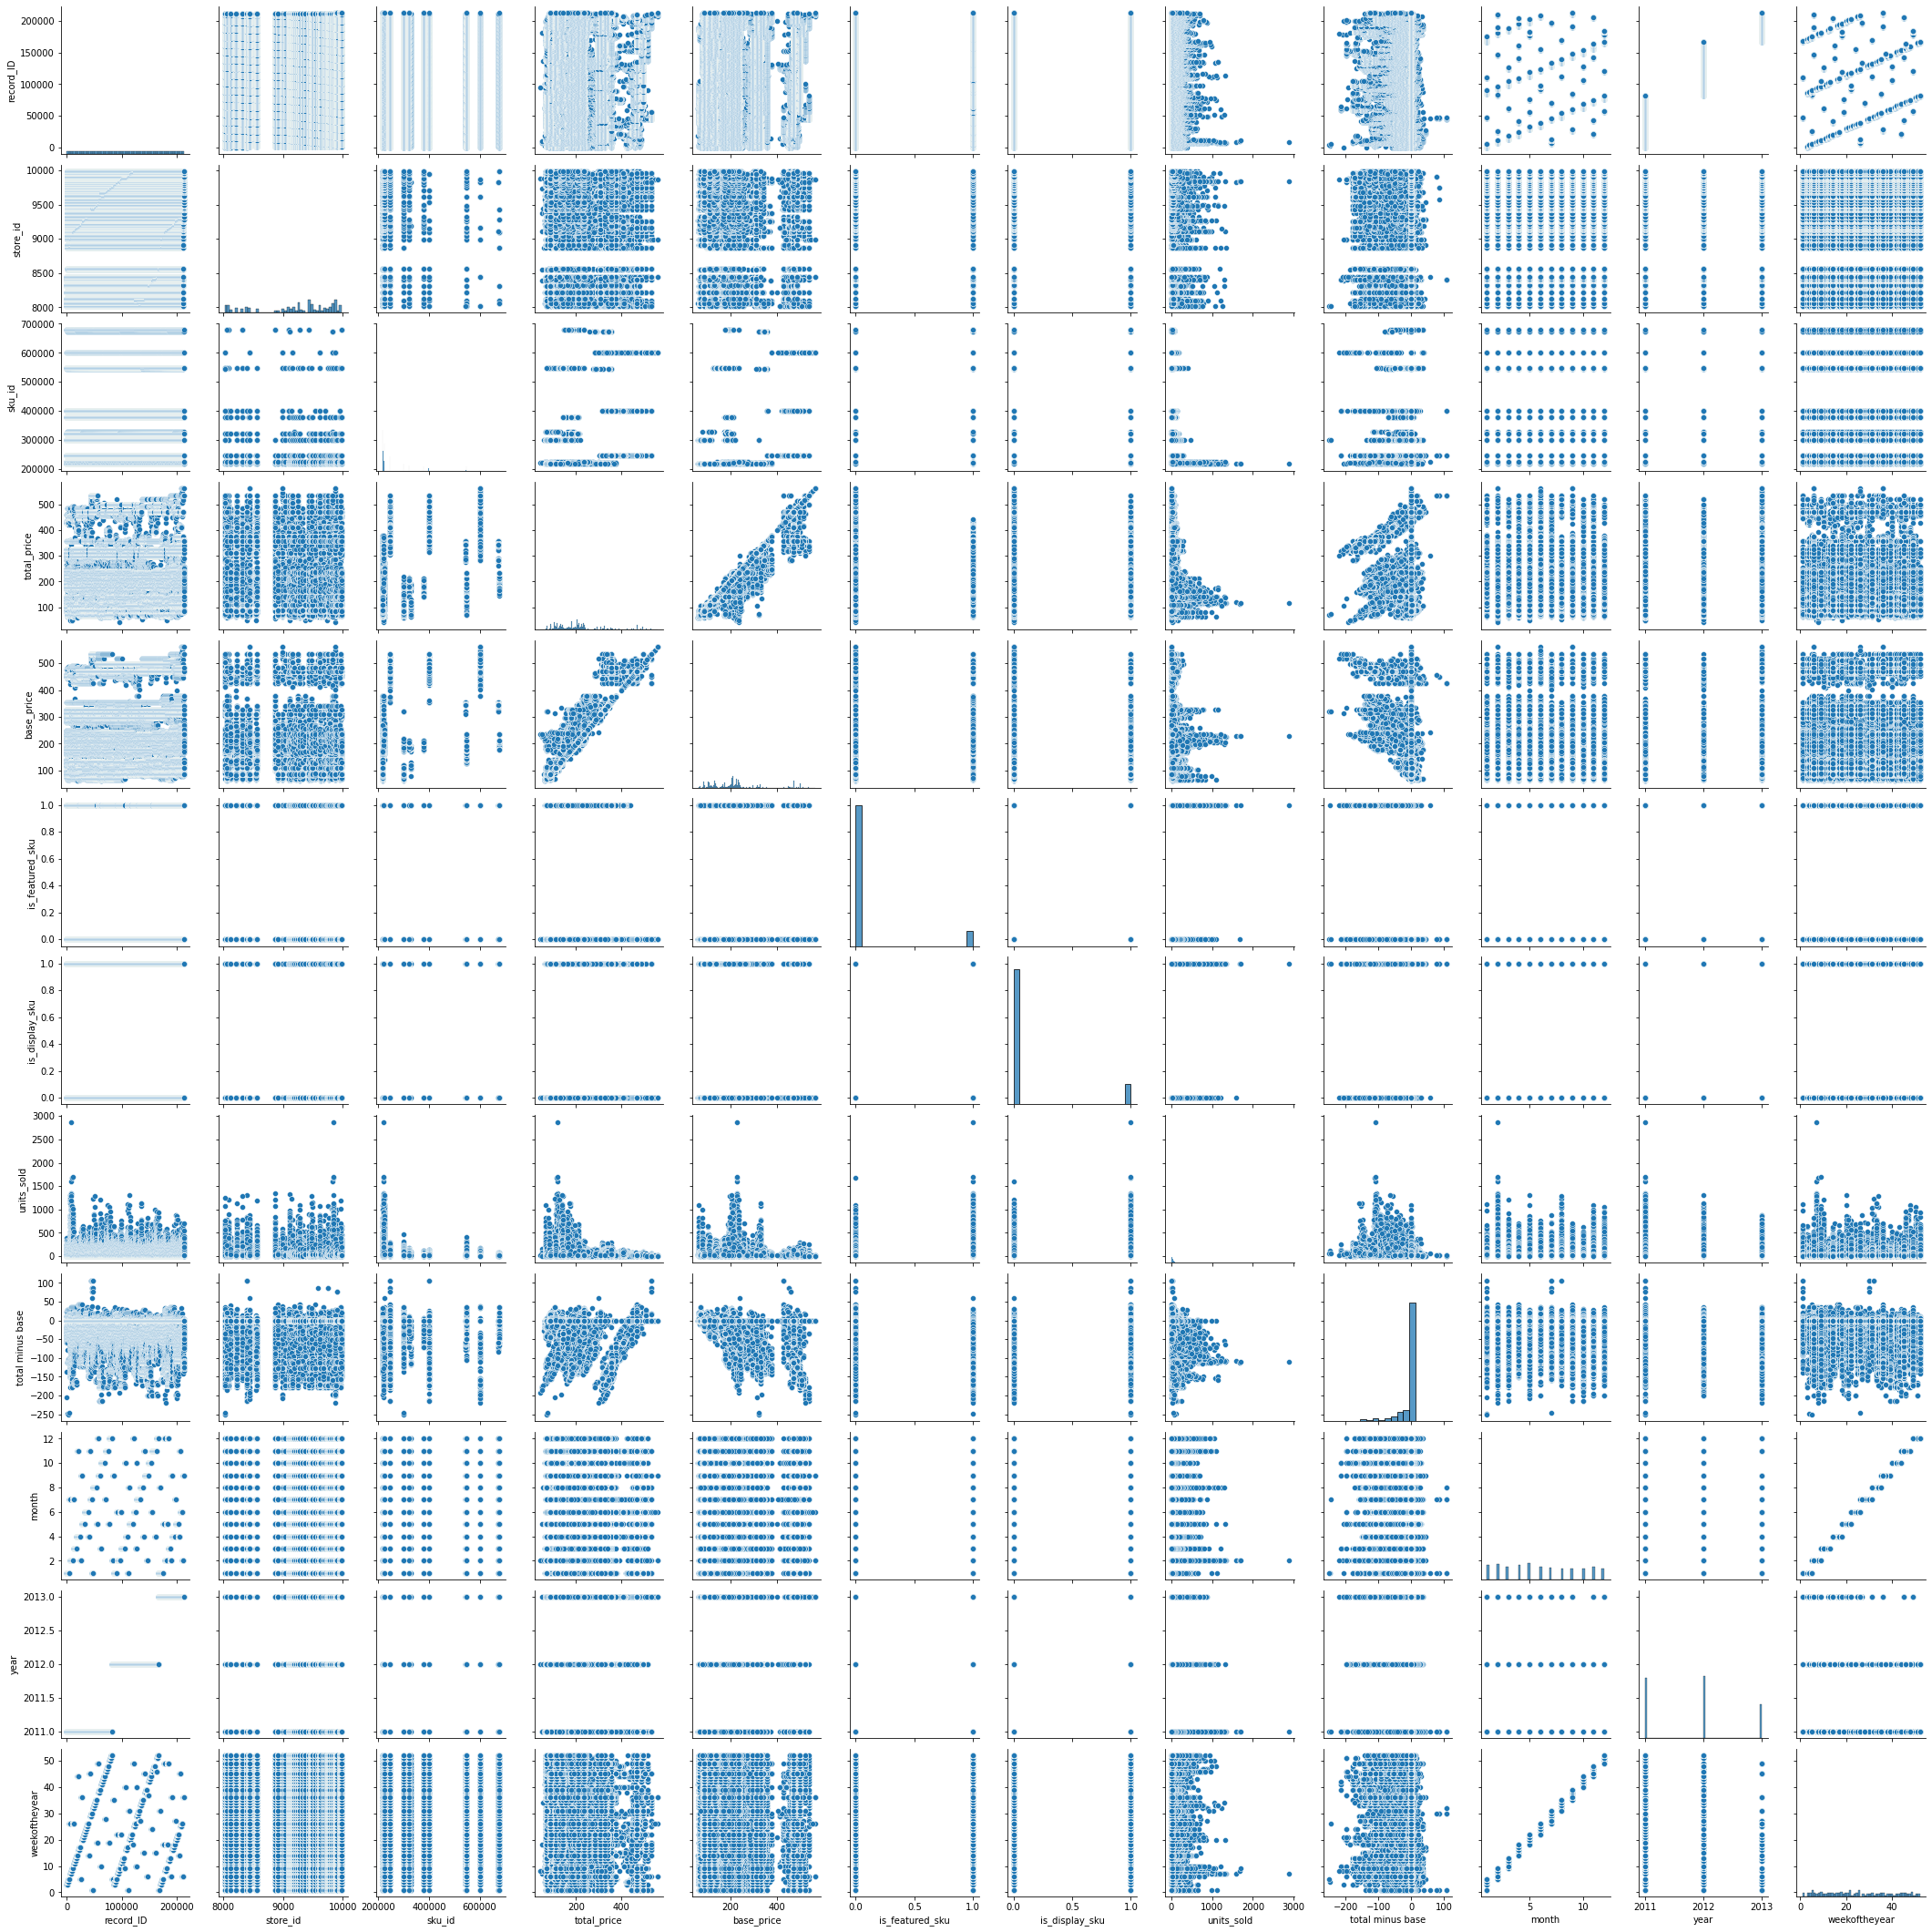

In [ ]:
plt.figure(figsize=(8, 6))
sns.pairplot(dftrain)


In [ ]:
core = dftrain.corr()
print(core.sort_values(by = 'units_sold',ascending=False))

                  record_ID      store_id        sku_id  total_price  \
units_sold        -0.010616 -4.371507e-03 -1.843798e-01    -0.235634   
is_display_sku     0.020428  1.343959e-02  1.491057e-02    -0.065935   
is_featured_sku    0.031358 -8.729370e-03 -2.225491e-02     0.050348   
month              0.090351 -1.035187e-15 -1.057602e-15     0.002057   
weekoftheyear      0.092866 -1.414442e-15 -1.022988e-15     0.001957   
store_id           0.007464  1.000000e+00 -6.862856e-02    -0.038308   
year               0.929639  6.712204e-15  7.678163e-15     0.008749   
record_ID          1.000000  7.464429e-03 -4.772670e-04     0.008497   
base_price         0.018932 -3.884811e-02  1.190677e-01     0.958886   
sku_id            -0.000477 -6.862856e-02  1.000000e+00     0.119327   
total_price        0.008497 -3.830780e-02  1.193275e-01     1.000000   
total minus base  -0.038649  1.115817e-02 -2.794401e-02    -0.097633   

                  base_price  is_featured_sku  is_display_sku  

In [ ]:
def gen_count_id(dftrain,dftest,col,name):
    temp=dftrain.groupby(col)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
    dftrain=pd.merge(dftrain,temp,how='left',on=col)
    dftest=pd.merge(dftest,temp,how='left',on=col)
    dftrain[name]=dftrain[name].astype(float)
    dftest[name]=dftest[name].astype(float)
    dftrain[name].fillna(np.median(temp[name]),inplace=True)
    dftest[name].fillna(np.median(temp[name]),inplace=True)
    return dftrain,dftest

def gen_average_units(dftrain,dftest,col,name):
    temp=dftrain.groupby(col)['units_sold'].mean().reset_index().rename(columns={'units_sold':name})
    dftrain=pd.merge(dftrain,temp,how='left',on=col)
    dftest=pd.merge(dftest,temp,how='left',on=col)
    dftrain[name].fillna(np.median(temp[name]),inplace=True)
    dftest[name].fillna(np.median(temp[name]),inplace=True)
    return dftrain,dftest

def gen_average_price(dftrain,dftest,col,price='base_price',name='name'):
    temp=dftrain.groupby(col)[price].mean().reset_index().rename(columns={price:name})
    dftrain=pd.merge(dftrain,temp,how='left',on=col)
    dftest=pd.merge(dftest,temp,how='left',on=col)
    dftrain[name].fillna(np.median(temp[name]),inplace=True)
    dftest[name].fillna(np.median(temp[name]),inplace=True)
    return dftrain,dftest


In [ ]:
dftrain.columns

Index(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold', 'total minus base',
       'Discounted/Not Discounted', 'Actual Date', 'month', 'year',
       'weekoftheyear', 'day'],
      dtype='object')

In [ ]:
dftrain.isna().sum()

record_ID                         0
store_id                          0
sku_id                            0
total_price                       0
base_price                        0
is_featured_sku                   0
is_display_sku                    0
units_sold                        0
total minus base                  0
Discounted/Not Discounted         0
month                             0
year                              0
weekoftheyear                     0
day                               0
count_id_sku_store           150150
count_id_sku                 150150
count_id_store               150150
count                             0
countIDskustore                   0
dtype: int64

In [ ]:
dftest.isna().sum()

record_ID                        0
store_id                         0
sku_id                           0
total_price                      0
base_price                       0
is_featured_sku                  0
is_display_sku                   0
total minus base                 0
Discounted/Not Discounted        0
month                            0
year                             0
weekoftheyear                    0
day                              0
count_id_sku_store           13860
count_id_sku                 13860
count_id_store               13860
count                            0
countIDskustore                  0
dtype: int64

In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150150 entries, 0 to 150149
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   record_ID                  150150 non-null  int64  
 1   store_id                   150150 non-null  int64  
 2   sku_id                     150150 non-null  int64  
 3   total_price                150150 non-null  float64
 4   base_price                 150150 non-null  float64
 5   is_featured_sku            150150 non-null  int64  
 6   is_display_sku             150150 non-null  int64  
 7   units_sold                 150150 non-null  int64  
 8   total minus base           150150 non-null  float64
 9   Discounted/Not Discounted  150150 non-null  object 
 10  month                      150150 non-null  int64  
 11  year                       150150 non-null  int64  
 12  weekoftheyear              150150 non-null  int64  
 13  day                        15

In [ ]:
dftrain,dftest = gen_count_id(dftrain,dftest,col=['sku_id','store_id'],name= 'count_id_sku_store')     #Genearting count of records per sku-id & store-id
dftrain,dftest = gen_count_id(dftrain,dftest,col=['sku_id'],name='count_id_sku')     #Genearting count of records per sku-id
dftrain,dftest = gen_count_id(dftrain,dftest,col=['store_id'],name='count_id_store')      #Genearting count of records per store-id

dftrain,dftest = gen_average_units(dftrain,dftest,col=['sku_id','store_id'],name='count_sku_store_id') #Genearting average units sold per ku-id & store-id
dftrain,dftest = gen_average_units(dftrain,dftest,col=['store_id'],name='count_store_id') #Genearting average units sold per store-id
dftrain,dftest = gen_average_units(dftrain,dftest,col=['sku_id'],name='count_sku_id') #Genearting average units sold per sku-id

dftrain,dftest = gen_average_price(dftrain,dftest,col=['sku_id','store_id'],price='base_price',name='price_sku_store') #Genearting average base price per sku-id & store-id
dftrain,dftest = gen_average_price(dftrain,dftest,col=['sku_id','store_id'],price='total_price',name='price_to_sku_store') #Genearting average total price per sku-id & store-id
dftrain,dftest = gen_average_price(dftrain,dftest,col=['store_id'],price='base_price',name='price_store_id') #Genearting average base price per store-id
dftrain,dftest = gen_average_price(dftrain,dftest,col=['sku_id'],price='base_price',name='price_sku_id') #Genearting average base price per sku-id
dftrain,dftest = gen_average_price(dftrain,dftest,col=['store_id'],price='total_price',name='price_to_store_id') #Genearting average total price per store-id
dftrain,dftest = gen_average_price(dftrain,dftest,col=['sku_id'],price='total_price',name='price_to_sku_id') #Genearting average total price per sku-id

In [ ]:
dftrain.columns

Index(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold', 'total minus base',
       'Discounted/Not Discounted', 'month', 'year', 'weekoftheyear', 'day',
       'count_id_sku_store', 'count_id_sku', 'count_id_store',
       'count_sku_store_id', 'count_store_id', 'count_sku_id',
       'price_sku_store', 'price_to_sku_store', 'price_store_id',
       'price_sku_id', 'price_to_store_id', 'price_to_sku_id'],
      dtype='object')

In [ ]:
dftest.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,total minus base,Discounted/Not Discounted,month,year,weekoftheyear,day,count_id_sku_store,count_id_sku,count_id_store,count_sku_store_id,count_store_id,count_sku_id,price_sku_store,price_to_sku_store,price_store_id,price_sku_id,price_to_store_id,price_to_sku_id
0,212645,8091,216418,108.3000,108.3000,0,0,0.0,Not Discounted,7,2013,29,Tuesday,130.0,8840.0,1170.0,26.376923,32.805983,88.923869,105.800769,102.117692,181.312372,94.688268,172.272756,91.982702
1,212646,8091,216419,109.0125,109.0125,0,0,0.0,Not Discounted,7,2013,29,Tuesday,130.0,8710.0,1170.0,28.307692,32.805983,72.182664,105.839135,102.473942,181.312372,94.908763,172.272756,92.349162
2,212647,8091,216425,133.9500,133.9500,0,0,0.0,Not Discounted,7,2013,29,Tuesday,130.0,8580.0,1170.0,25.669231,32.805983,34.019231,131.204135,126.671538,181.312372,128.285210,172.272756,125.156355
3,212648,8091,216233,133.9500,133.9500,0,0,0.0,Not Discounted,7,2013,29,Tuesday,130.0,9620.0,1170.0,29.107692,32.805983,46.821206,129.916154,126.167308,181.312372,128.101871,172.272756,124.942208
4,212649,8091,217390,176.7000,176.7000,0,0,0.0,Not Discounted,7,2013,29,Tuesday,130.0,9100.0,1170.0,29.469231,32.805983,62.312747,164.439519,152.968269,181.312372,158.990538,172.272756,150.867334


cyclic features

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
type(dftrain['week'])

pandas.core.series.Series

In [ ]:
#Converting week feature
le = OrdinalEncoder()
dftrain['week_1']= le.fit_transform(dftrain['week'])
le = OrdinalEncoder()
dftest['week_1']= le.fit_transform(dftest['week'])+130

#Creating week number feature
dftrain['week_num']=dftrain.week_1%52
dftest['week_num']=dftest.week_1%52

dftrain['week_num1']=dftrain.week_1%4
dftest['week_num1']=dftest.week_1%4

# Encoding 'week' it using sine and cosine transform; considering it as a cyclic feature
dftrain['week_sin'] = np.sin(2 * np.pi * dftrain['week_1'] / 52.143)
dftrain['week_cos'] = np.cos(2 * np.pi * dftrain['week_1'] / 52.143)
dftest['week_sin'] = np.sin(2 * np.pi * dftest['week_1'] / 52.143)
dftest['week_cos'] = np.cos(2 * np.pi * dftest['week_1'] / 52.143)

#Creating feature: percent difference between base price and checkout price.
dftrain['price_diff_percent'] = (dftrain['base_price'] - dftrain['total_price']) / dftrain['base_price']
dftest['price_diff_percent'] = (dftest['base_price'] - dftest['total_price']) / dftest['base_price']

In [ ]:
X= dftrain[list(set(dftrain.columns)-set(['record_ID','units_sold','week']))]
Y= np.log1p(dftrain['units_sold'])
X_test= dftest[list(set(dftest.columns)-set(['record_ID','week']))]

In [ ]:
X.head()

,count_sku_store_id,price_sku_store,month,is_featured_sku,total_price,day,count_id_store,price_sku_id,count_sku_id,year,price_store_id,Discounted/Not Discounted,weekoftheyear,price_to_sku_store,base_price,count_id_sku_store,price_to_sku_id,sku_id,is_display_sku,store_id,count_store_id,count_id_sku,total minus base,price_to_store_id
0,26.376923,105.800769,1,0,99.0375,Monday,1170.0,94.688268,88.923869,2011,181.312372,Discounted,3,102.117692,111.8625,130.0,91.982702,216418,0,8091,32.805983,8840.0,-12.825,172.272756
1,28.307692,105.839135,1,0,99.0375,Monday,1170.0,94.908763,72.182664,2011,181.312372,Not Discounted,3,102.473942,99.0375,130.0,92.349162,216419,0,8091,32.805983,8710.0,0.000,172.272756
2,25.669231,131.204135,1,0,133.9500,Monday,1170.0,128.285210,34.019231,2011,181.312372,Not Discounted,3,126.671538,133.9500,130.0,125.156355,216425,0,8091,32.805983,8580.0,0.000,172.272756
3,29.107692,129.916154,1,0,133.9500,Monday,1170.0,128.101871,46.821206,2011,181.312372,Not Discounted,3,126.167308,133.9500,130.0,124.942208,216233,0,8091,32.805983,9620.0,0.000,172.272756
4,29.469231,164.439519,1,0,141.0750,Monday,1170.0,158.990538,62.312747,2011,181.312372,Not Discounted,3,152.968269,141.0750,130.0,150.867334,217390,0,8091,32.805983,9100.0,0.000,172.272756


In [ ]:
X= X.astype({'sku_id': 'category','store_id': 'category', 'Discounted/Not Discounted': 'category', 'day': 'category'})
X_test= X_test.astype({'sku_id': 'category','store_id': 'category', 'Discounted/Not Discounted': 'category', 'day': 'category'})

In [ ]:
category_list=['store_id','sku_id', 'Discounted/Not Discounted','day']

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders

In [ ]:
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder
from scipy.special import boxcox1p


In [ ]:
encoder_final = MEstimateEncoder()
encoder_final.fit(X[category_list],Y)

cat_enc = encoder_final.transform(X[category_list],Y)
continous_train = X.drop(columns = category_list)
X = pd.concat([cat_enc,continous_train], axis=1)

test_enc = encoder_final.transform(X_test[category_list])
continous_test = X_test.drop(columns = category_list)
X_test = pd.concat ([test_enc,continous_test],axis=1)

In [ ]:
X_test.head()

,store_id,sku_id,Discounted/Not Discounted,day,count_sku_store_id,price_sku_store,month,is_featured_sku,total_price,count_id_store,price_sku_id,count_sku_id,year,price_store_id,weekoftheyear,price_to_sku_store,base_price,count_id_sku_store,price_to_sku_id,is_display_sku,count_store_id,count_id_sku,total minus base,price_to_store_id
0,3.250779,4.201821,3.431311,3.554709,26.376923,105.800769,7,0,108.3000,1170.0,94.688268,88.923869,2013,181.312372,29,102.117692,108.3000,130.0,91.982702,0,32.805983,8840.0,0.0,172.272756
1,3.250779,4.051982,3.431311,3.554709,28.307692,105.839135,7,0,109.0125,1170.0,94.908763,72.182664,2013,181.312372,29,102.473942,109.0125,130.0,92.349162,0,32.805983,8710.0,0.0,172.272756
2,3.250779,3.303344,3.431311,3.554709,25.669231,131.204135,7,0,133.9500,1170.0,128.285210,34.019231,2013,181.312372,29,126.671538,133.9500,130.0,125.156355,0,32.805983,8580.0,0.0,172.272756
3,3.250779,3.715659,3.431311,3.554709,29.107692,129.916154,7,0,133.9500,1170.0,128.101871,46.821206,2013,181.312372,29,126.167308,133.9500,130.0,124.942208,0,32.805983,9620.0,0.0,172.272756
4,3.250779,3.850743,3.431311,3.554709,29.469231,164.439519,7,0,176.7000,1170.0,158.990538,62.312747,2013,181.312372,29,152.968269,176.7000,130.0,150.867334,0,32.805983,9100.0,0.0,172.272756


In [ ]:
X.head()

,store_id,sku_id,Discounted/Not Discounted,day,count_sku_store_id,price_sku_store,month,is_featured_sku,total_price,count_id_store,price_sku_id,count_sku_id,year,price_store_id,weekoftheyear,price_to_sku_store,base_price,count_id_sku_store,price_to_sku_id,is_display_sku,count_store_id,count_id_sku,total minus base,price_to_store_id
0,3.250779,4.201821,4.052542,3.626021,26.376923,105.800769,1,0,99.0375,1170.0,94.688268,88.923869,2011,181.312372,3,102.117692,111.8625,130.0,91.982702,0,32.805983,8840.0,-12.825,172.272756
1,3.250779,4.051982,3.431311,3.626021,28.307692,105.839135,1,0,99.0375,1170.0,94.908763,72.182664,2011,181.312372,3,102.473942,99.0375,130.0,92.349162,0,32.805983,8710.0,0.000,172.272756
2,3.250779,3.303344,3.431311,3.626021,25.669231,131.204135,1,0,133.9500,1170.0,128.285210,34.019231,2011,181.312372,3,126.671538,133.9500,130.0,125.156355,0,32.805983,8580.0,0.000,172.272756
3,3.250779,3.715659,3.431311,3.626021,29.107692,129.916154,1,0,133.9500,1170.0,128.101871,46.821206,2011,181.312372,3,126.167308,133.9500,130.0,124.942208,0,32.805983,9620.0,0.000,172.272756
4,3.250779,3.850743,3.431311,3.626021,29.469231,164.439519,1,0,141.0750,1170.0,158.990538,62.312747,2011,181.312372,3,152.968269,141.0750,130.0,150.867334,0,32.805983,9100.0,0.000,172.272756


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2,random_state=23)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score,RepeatedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

import xgboost as xgb
import lightgbm as lgb
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge,LogisticRegressionCV,RidgeCV,LassoCV,ElasticNetCV,OrthogonalMatchingPursuit,ElasticNet,LassoLarsCV,BayesianRidge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC,SVR
from scipy import stats
from scipy.stats import norm, skew
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge

In [ ]:
rf_base= RandomForestRegressor()
rf_base.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=True, random_state=None,
                      verbose=0, warm_start=False)
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=30, max_features='sqrt',
                      min_samples_split=10, n_estimators=600, oob_score=True)

In [ ]:
lg_base = lgb.LGBMRegressor()
lg_base.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
lg  = lgb.LGBMRegressor(objective= 'regression',bagging_fraction=0.8, bagging_frequency=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, n_estimators=200, n_jobs=-1,
              num_leaves=1200,random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)
#lg.get_params()

In [ ]:
model_lg= lg.fit(x_train, y_train)

In [ ]:
prediction_rfb_valid = rf_base.predict(x_valid)
prediction_rft_valid = rf.predict(x_valid)
prediction_lgbmb_valid = lg_base.predict(x_valid)
prediction_lgbmt_valid = lg.predict(x_valid)

rf_base_msle= 100*mean_squared_log_error(y_valid,prediction_rfb_valid)
rf_tuned_msle= 100*mean_squared_log_error(y_valid,prediction_rft_valid)
lgbm_base_msle= 100*mean_squared_log_error(y_valid,prediction_lgbmb_valid)
lgbm_tuned_msle= 100*mean_squared_log_error(y_valid,prediction_lgbmt_valid)

prediction_ensemble_base= (((1-rf_base_msle)*prediction_rfb_valid)+((1-lgbm_base_msle)*prediction_lgbmb_valid))/(2-rf_base_msle-lgbm_base_msle)
prediction_ensemble_tuned= (((1-rf_tuned_msle)*prediction_rft_valid)+((1-lgbm_tuned_msle)*prediction_lgbmt_valid))/(2-rf_tuned_msle-lgbm_tuned_msle)

ensemble_base_msle = 100*mean_squared_log_error(y_valid,prediction_ensemble_base)
ensemble_tuned_msle= 100*mean_squared_log_error(y_valid,prediction_ensemble_tuned)


print("RF Base: {}; RF Tuned: {}".format(rf_base_msle,rf_tuned_msle))
print("LGBM Base: {}; LGBM Tuned: {}".format(lgbm_base_msle,lgbm_tuned_msle))
print("Ensemble Base: {}; Ensemble Tuned: {}".format(ensemble_base_msle,ensemble_tuned_msle))

RF Base: 0.9238557129417693; RF Tuned: 0.9235293533684303
LGBM Base: 0.9297982622981489; LGBM Tuned: 0.7674331623666918
Ensemble Base: 0.8707853492529699; Ensemble Tuned: 0.7826031877407188


In [ ]:
X_test.head()

,store_id,sku_id,Discounted/Not Discounted,day,count_sku_store_id,price_sku_store,month,is_featured_sku,total_price,count_id_store,price_sku_id,count_sku_id,year,price_store_id,weekoftheyear,price_to_sku_store,base_price,count_id_sku_store,price_to_sku_id,is_display_sku,count_store_id,count_id_sku,total minus base,price_to_store_id
0,3.250779,4.201821,3.431311,3.554709,26.376923,105.800769,7,0,108.3000,1170.0,94.688268,88.923869,2013,181.312372,29,102.117692,108.3000,130.0,91.982702,0,32.805983,8840.0,0.0,172.272756
1,3.250779,4.051982,3.431311,3.554709,28.307692,105.839135,7,0,109.0125,1170.0,94.908763,72.182664,2013,181.312372,29,102.473942,109.0125,130.0,92.349162,0,32.805983,8710.0,0.0,172.272756
2,3.250779,3.303344,3.431311,3.554709,25.669231,131.204135,7,0,133.9500,1170.0,128.285210,34.019231,2013,181.312372,29,126.671538,133.9500,130.0,125.156355,0,32.805983,8580.0,0.0,172.272756
3,3.250779,3.715659,3.431311,3.554709,29.107692,129.916154,7,0,133.9500,1170.0,128.101871,46.821206,2013,181.312372,29,126.167308,133.9500,130.0,124.942208,0,32.805983,9620.0,0.0,172.272756
4,3.250779,3.850743,3.431311,3.554709,29.469231,164.439519,7,0,176.7000,1170.0,158.990538,62.312747,2013,181.312372,29,152.968269,176.7000,130.0,150.867334,0,32.805983,9100.0,0.0,172.272756


In [ ]:
len(X_test)

13860

In [ ]:
model = lgb.LGBMRegressor()


In [ ]:
model.fit(X,Y)

LGBMRegressor()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
dfsub = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Demand Forecasting/sample_submission_pzljTaX.csv')

In [ ]:
dfsub.head()

,record_ID,units_sold
0,212645,0
1,212646,0
2,212647,0
3,212648,0
4,212649,0


In [ ]:
final_prediction=np.round(np.expm1(predictions))
dfsub['units_sold']=final_prediction

In [ ]:
dfsub.head()

,record_ID,units_sold
0,212645,19.0
1,212646,18.0
2,212647,22.0
3,212648,24.0
4,212649,23.0


In [ ]:
dfsub.to_csv('/content/drive/MyDrive/Colab_Notebooks/Demand Forecasting/submissionfinal.csv',index=False)